In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from Experiments.experiment import Experiment
import numpy as np

In [3]:
## BONGARD DATASET
# scaling experiment
base_path = "docker/Bongard/ScalingExperiment" + "/results/"
gnn_df = pd.read_csv(base_path + "gnn_results_combined.csv")
logic_df = pd.read_csv(base_path + "logic_results_combined.csv")


KeyError: 'type'

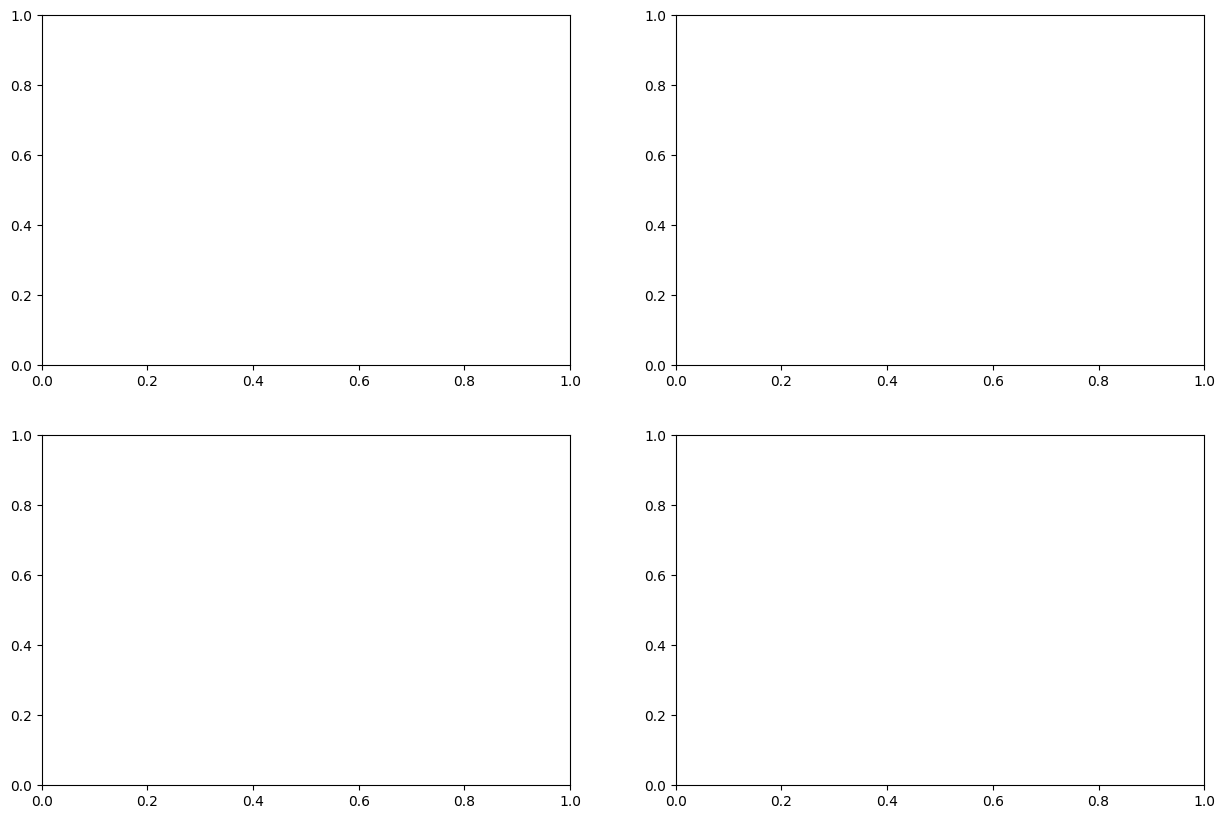

In [4]:
# figure with 2 plots in a row (2 row, 2 columns) one for GNN and one for logic

fig,axs = plt.subplots(2,2, figsize=(15,10))

# logic on the left of the figure, 1st row is accuracy, 2nd row is runtime
logic_testing = logic_df[logic_df['type'] == 'testing']
logic_training = logic_df[logic_df['type'] == 'training']

axs[0,0].plot(logic_testing['total_examples'],logic_testing['accuracy'])
axs[1,0].plot(logic_testing['total_examples'],logic_testing['runtime'])

# gnn on the right of the figure, 1st row is accuracy, 2nd row is runtime
node_only = gnn_df[gnn_df['representation'] == 'node_only']

for key, group in node_only.groupby('model'):
    axs[0,1].plot(group['train_size']+group['test_size'] + group['val_size'],group['test_acc_all'], label=key)
    axs[0,1].fill_between(group['train_size']+group['test_size'] + group['val_size'],group['test_acc_all'] - group['test_acc_all_std'], group['test_acc_all'] + group['test_acc_all_std'], alpha=0.3)
    axs[1,1].plot(group['train_size']+group['test_size'] + group['val_size'],group['runtime'], label=key)


# set the y limits of first row to be the same
for i in range(2):
    axs[0,i].set_ylim(0.7,1.02)
    axs[0,i].set_yticks([0.7,0.75,0.8,0.85,0.9,0.95,1.0])

plt.show()


In [ ]:
def plot_experiment_accuracy(path,x_axis,logic_key='system', gnn_key='representation'):
    exp = Experiment(path)
    logic_df = pd.read_csv(exp.results_path + "/logic_results_combined.csv")
    gnn_df = pd.read_csv(exp.results_path + "/gnn_results_combined.csv")

    fig,axs = plt.subplots(2,2, figsize=(15,10))
    for key, group in logic_df.groupby(logic_key):
        axs[0,0].plot(group[x_axis],group['train_acc'], label=key,marker='x')
        axs[0,1].plot(group[x_axis],group['accuracy'],label=key,marker='x')

    for key, group in gnn_df.groupby('representation'):
        grouped_mean_train = group.groupby(x_axis)['train_acc'].mean()
        grouped_mean_test = group.groupby(x_axis)['test_acc'].mean()
        axs[1,0].plot(grouped_mean_train.index,grouped_mean_train.values, label=key,marker='x')
        axs[1,1].plot(grouped_mean_test.index,grouped_mean_test.values,label=key,marker='x')
    
    # Add title
    fig.suptitle(path.split("/")[-1] + " Accuracy")

    for ax in axs.flatten():
        ax.legend()
        ax.set_ylim(0.4,1.02)
        ax.set_yticks(np.arange(0.4,1.05,0.05))
        ax.legend(loc='lower right')
    plt.show()
    return


def plot_experiment_runtime(path,x_axis,logic_key='system', gnn_key='representation'):
    exp = Experiment(path)
    logic_df = pd.read_csv(exp.results_path + "/logic_results_combined.csv")
    gnn_df = pd.read_csv(exp.results_path + "/gnn_results_combined.csv")

    fig,axs = plt.subplots(1,2, figsize=(15,10))
    for key, group in logic_df.groupby('system'):
        axs[0].plot(group[x_axis],group['runtime'], label=key, marker='x')

    for key, group in gnn_df.groupby('representation'):
        grouped_mean= group.groupby(x_axis)['runtime'].mean()
        axs[1].plot(grouped_mean.index,grouped_mean.values,label=key,marker='x')
    
    # Add title
    fig.suptitle(path.split("/")[-1] + " Runtime")

    for ax in axs.flatten():
        ax.legend()
        ax.legend(loc='lower right')
    plt.show()
    return


def plot_experiment_accuracy_test_only(path,x_axis,logic_key='system', gnn_key='representation'):
    exp = Experiment(path)
    logic_df = pd.read_csv(exp.results_path + "/logic_results_combined.csv")
    gnn_df = pd.read_csv(exp.results_path + "/gnn_results_combined.csv")

    fig,axs = plt.subplots(1,2, figsize=(15,10))
    for key, group in logic_df.groupby(logic_key):
        axs[0].plot(group[x_axis],group['accuracy'],label=key,marker='x')

    for key, group in gnn_df.groupby('representation'):
        grouped_mean_train = group.groupby(x_axis)['train_acc'].mean()
        grouped_mean_test = group.groupby(x_axis)['test_acc'].mean()
        axs[1].plot(grouped_mean_test.index,grouped_mean_test.values,label=key,marker='x')
    
    # Add title
    fig.suptitle(path.split("/")[-1] + " Accuracy")

    for ax in axs.flatten():
        ax.legend()
        ax.set_ylim(0.5,1.02)
        ax.set_yticks(np.arange(0.5,1.05,0.05))
        ax.legend(loc='lower right')
    plt.show()
    return


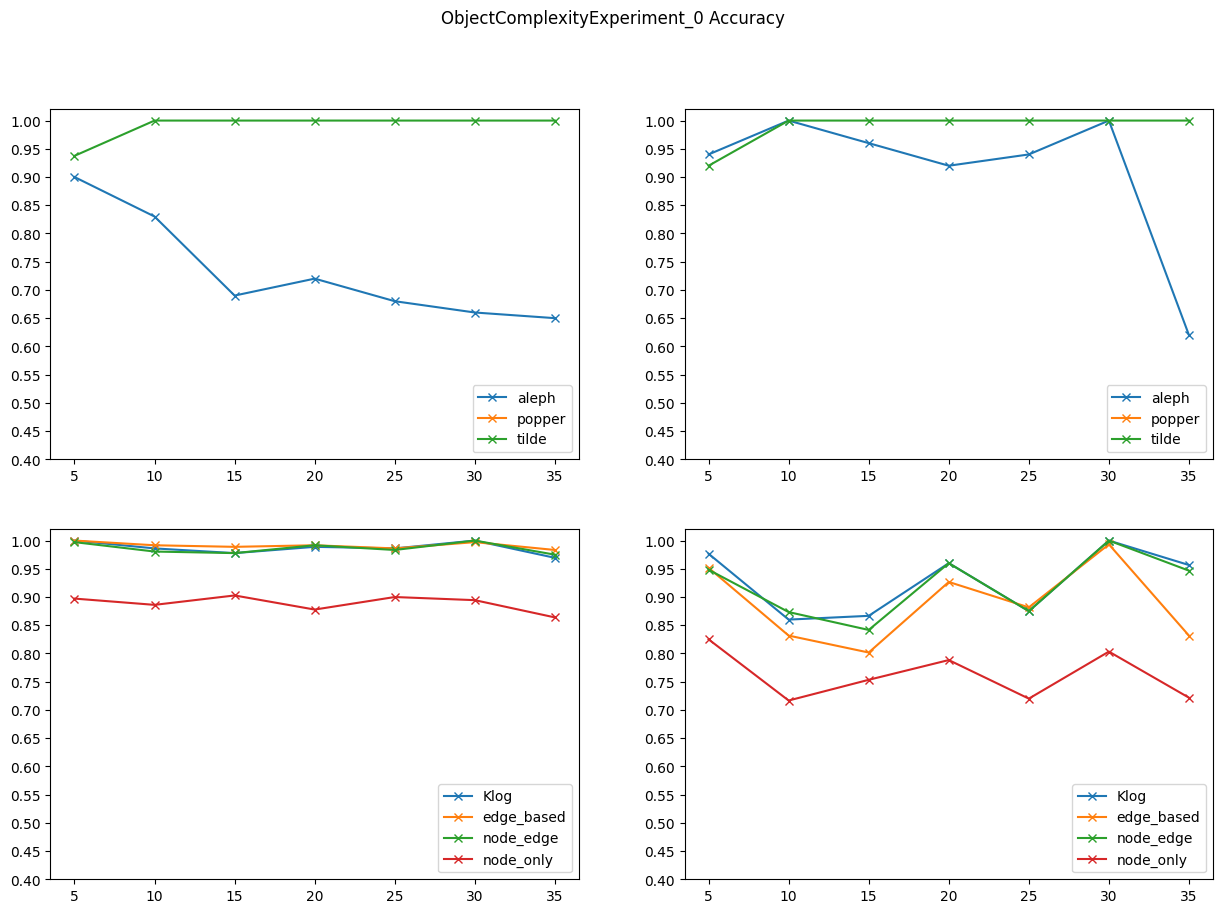

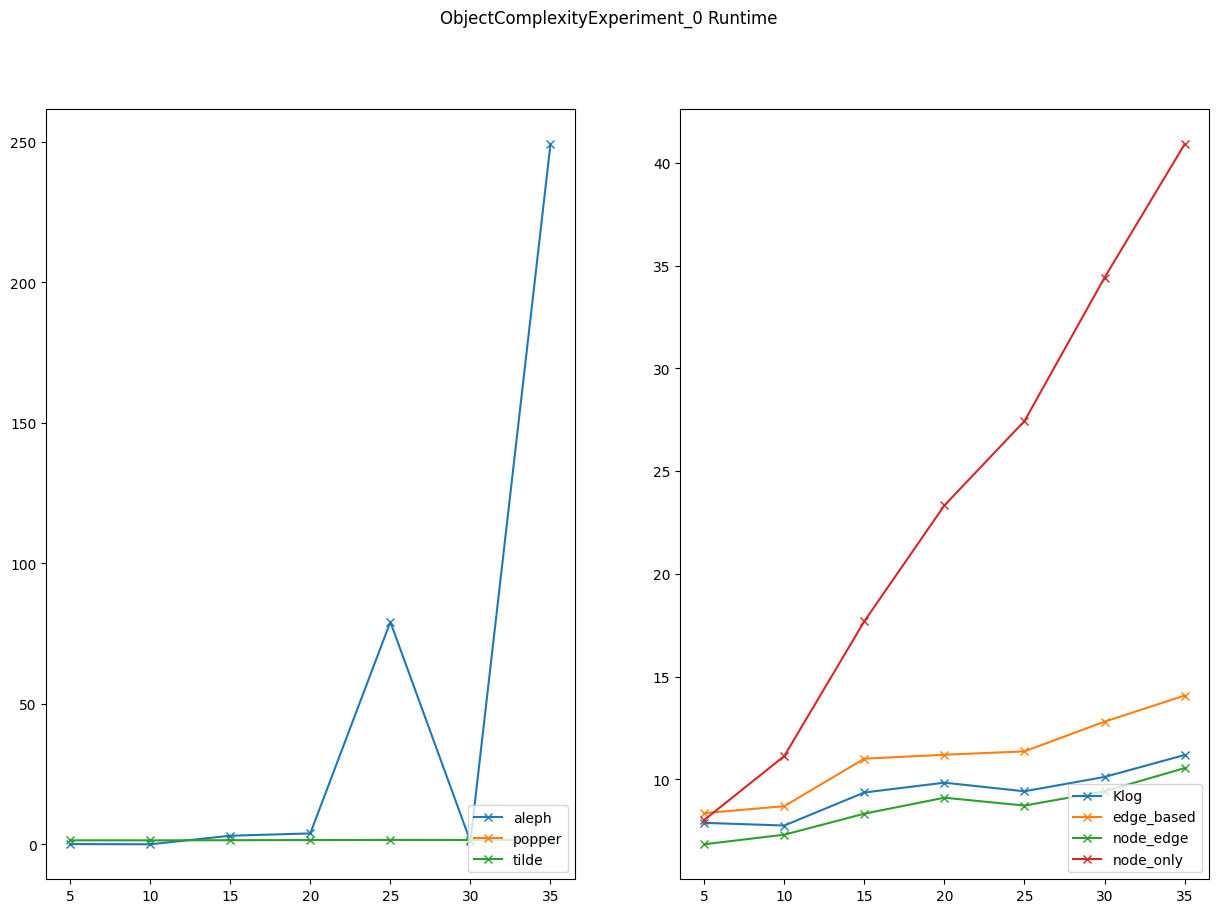

In [ ]:
plot_experiment_accuracy("Bongard/ObjectComplexityExperiment_0", x_axis='object_complexity',logic_key='system', gnn_key='representation')
plot_experiment_runtime("Bongard/ObjectComplexityExperiment_0", x_axis='object_complexity',logic_key='system', gnn_key='representation')


In [ ]:

plot_experiment_accuracy("Bongard/RelationComplexityExperiment_0", x_axis='relation_complexity',logic_key='system', gnn_key='representation')
plot_experiment_runtime("Bongard/RelationComplexityExperiment_0", x_axis='relation_complexity',logic_key='system', gnn_key='representation')



EmptyDataError: No columns to parse from file

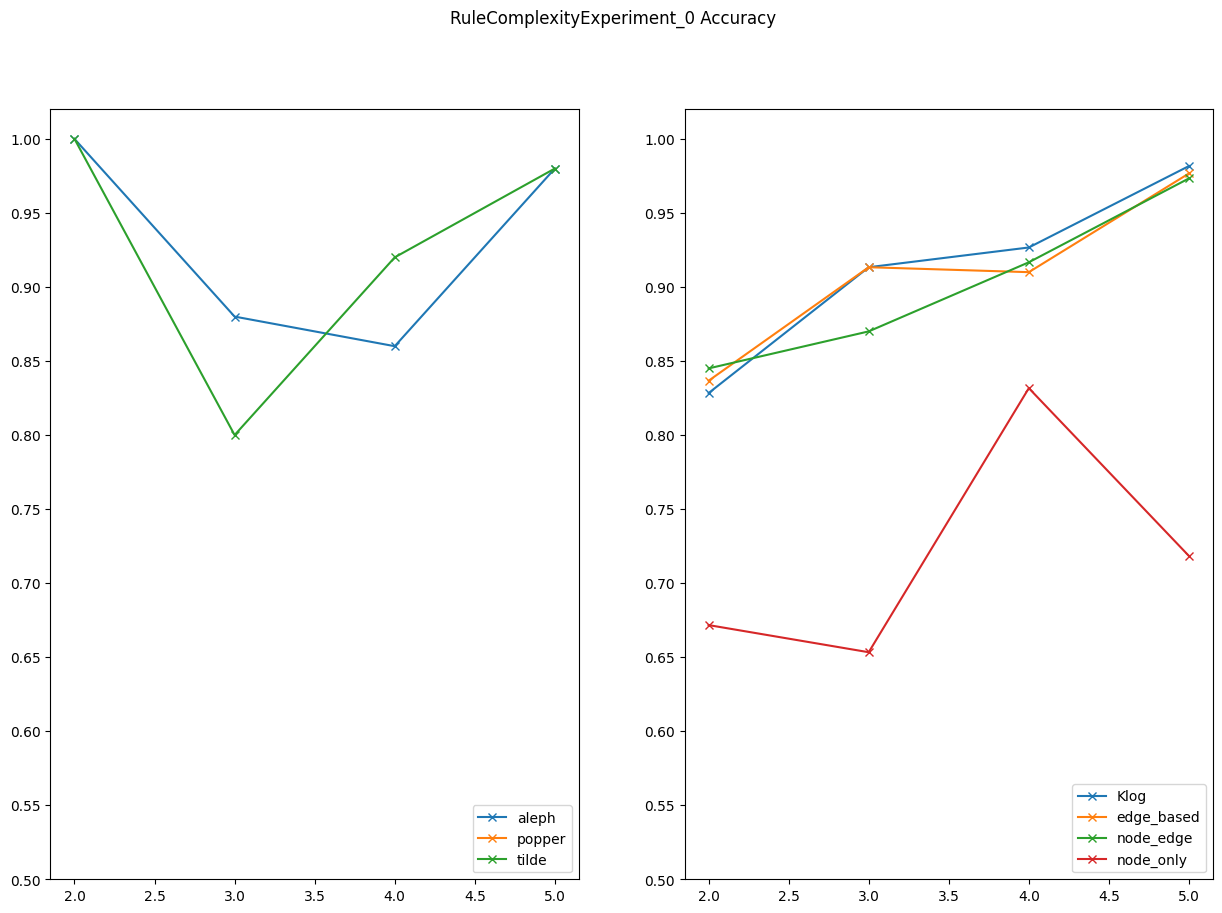

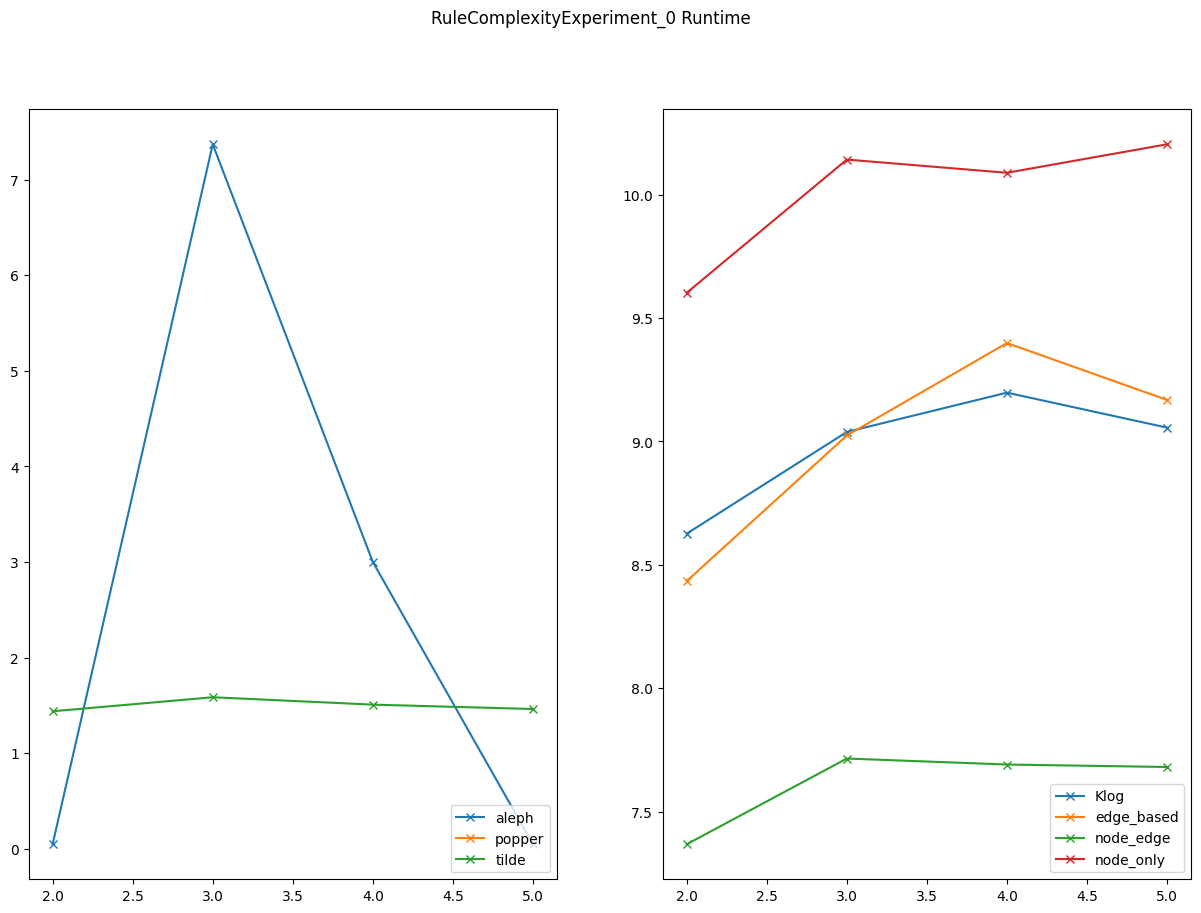

In [ ]:
plot_experiment_accuracy_test_only("Bongard/RuleComplexityExperiment_0", x_axis='rule_complexity',logic_key='system', gnn_key='representation')
plot_experiment_runtime("Bongard/RuleComplexityExperiment_0", x_axis='rule_complexity',logic_key='system', gnn_key='representation')

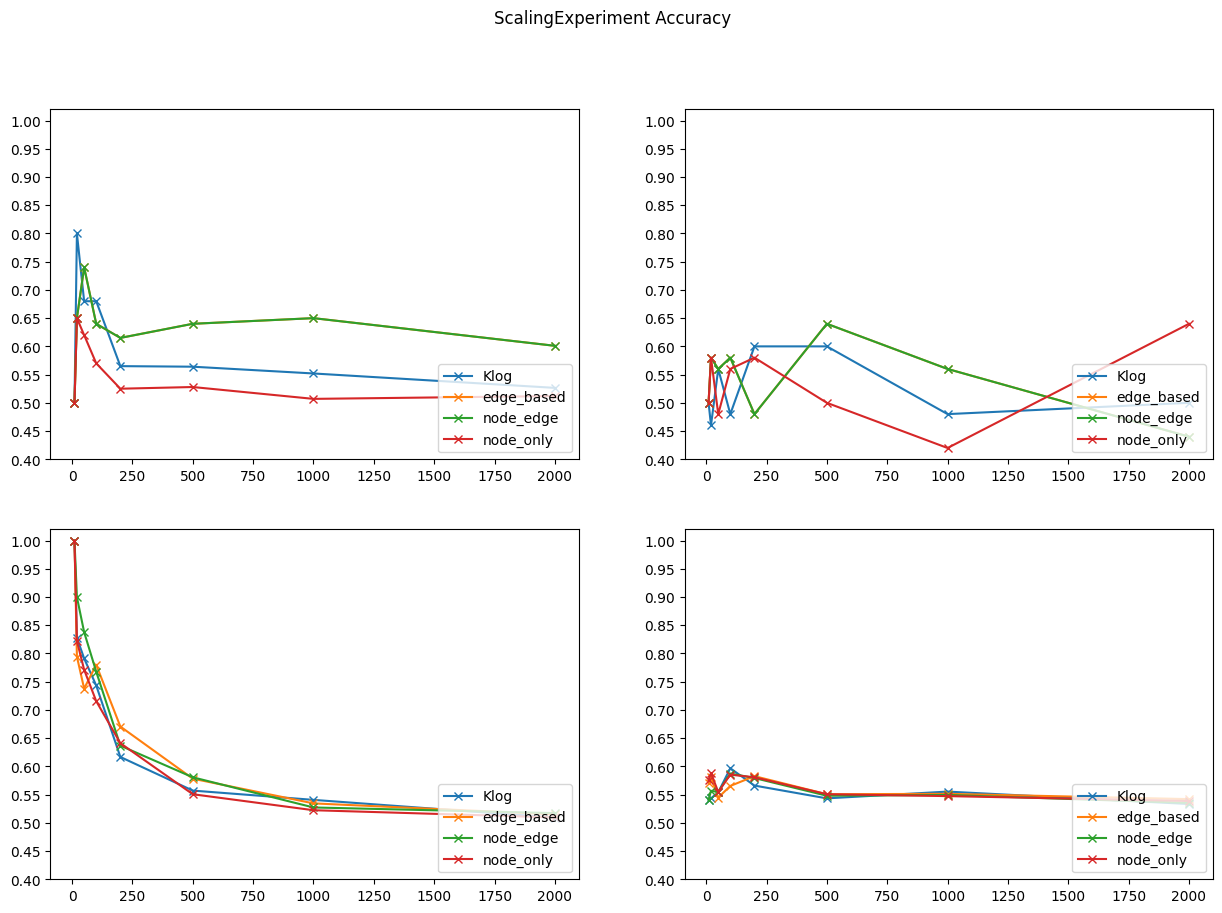

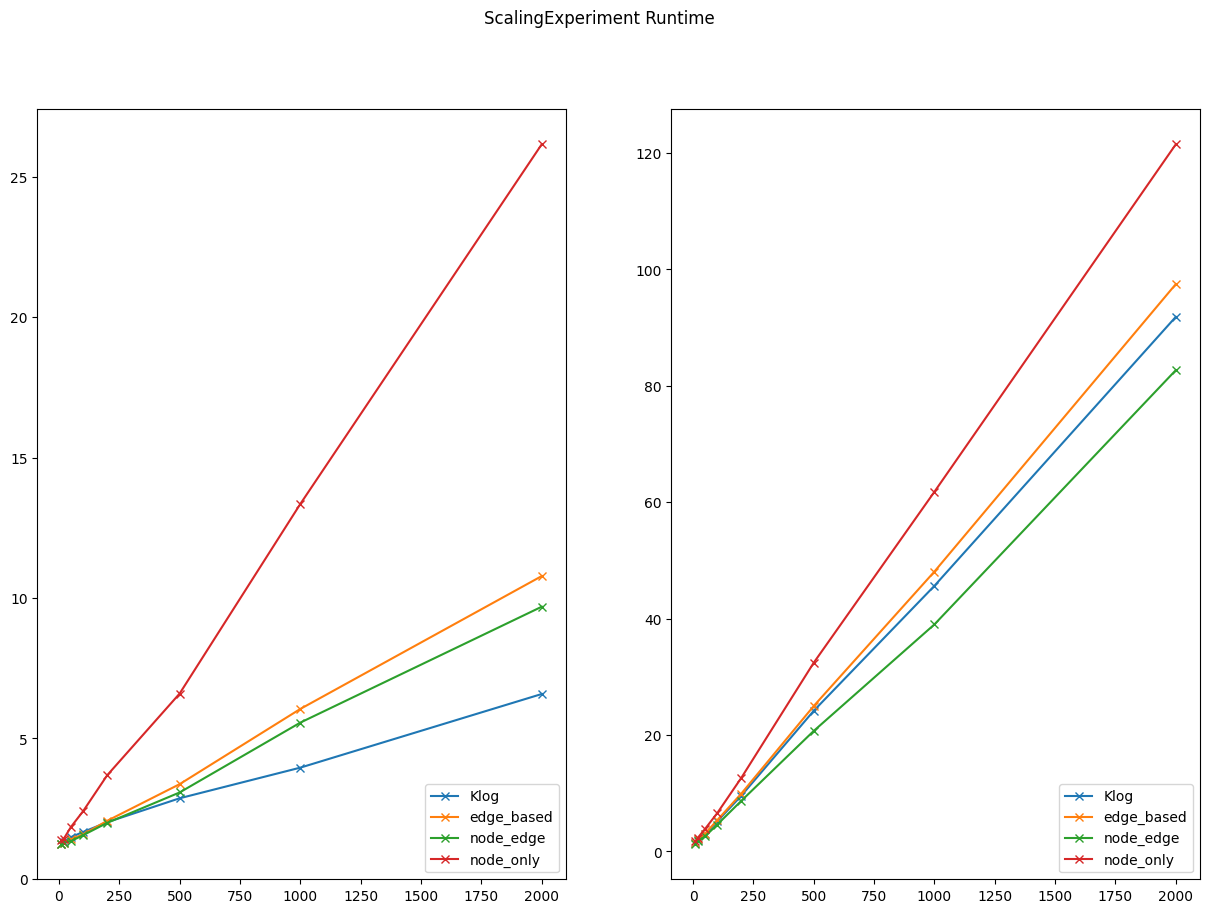

In [ ]:
exp_string = "Bongard/ScalingExperiment"
plot_experiment_accuracy(exp_string, x_axis='num_examples',logic_key='system', gnn_key='representation')
plot_experiment_runtime(exp_string, x_axis='num_examples',logic_key='system', gnn_key='representation')

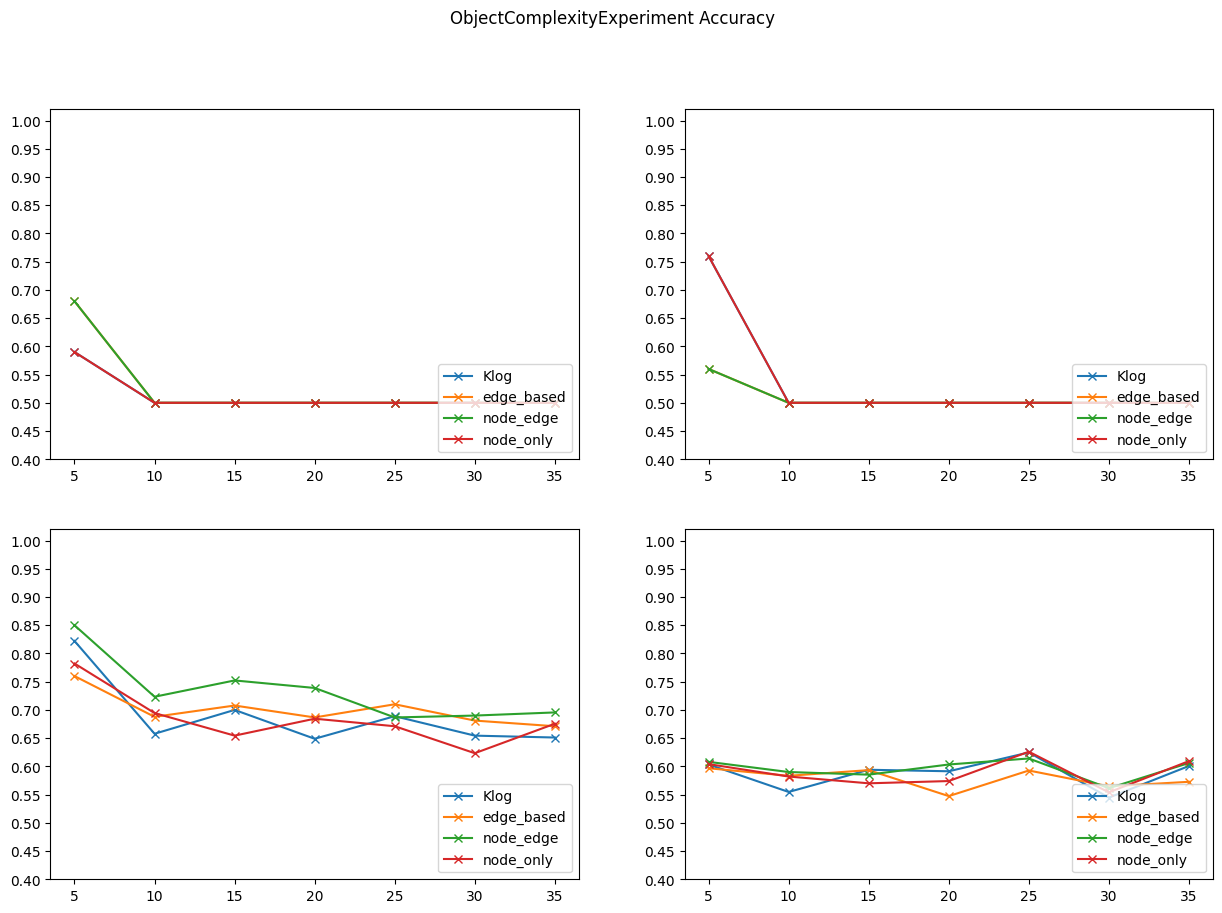

In [ ]:

exp_string = "Bongard/ObjectComplexityExperiment"
plot_experiment_accuracy(exp_string, x_axis='object_complexity',logic_key='system', gnn_key='representation')

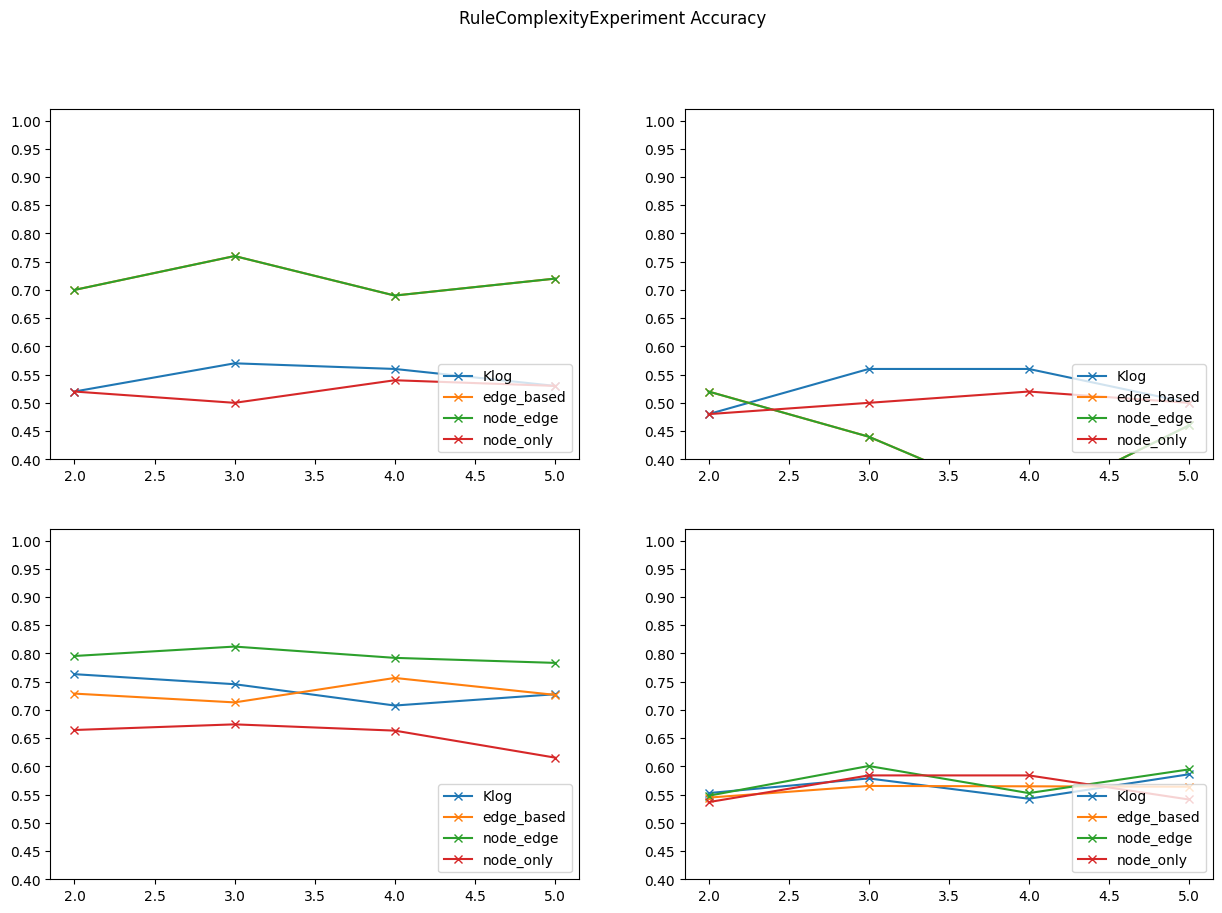

In [ ]:
exp_string = "Bongard/RuleComplexityExperiment"
plot_experiment_accuracy(exp_string, x_axis='rule_complexity',logic_key='system', gnn_key='representation')

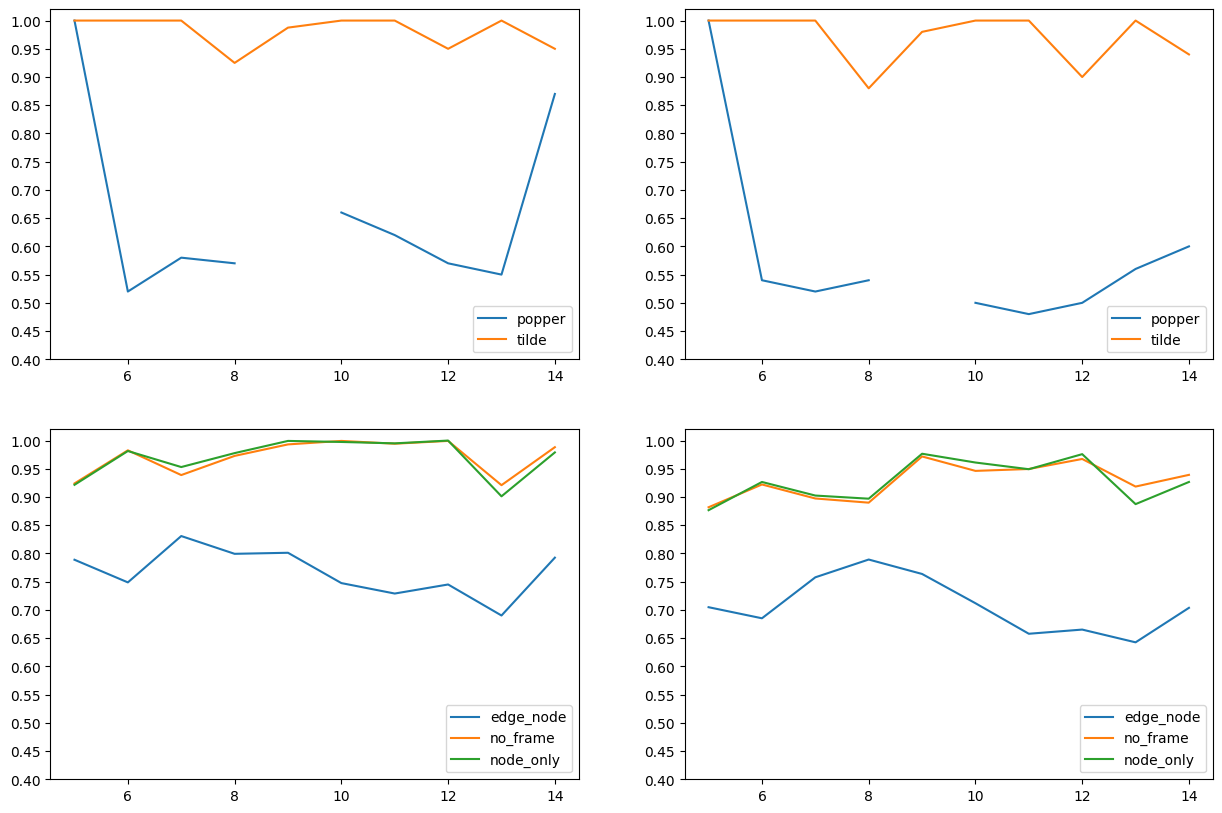

In [ ]:
# object complexity experiment

path = "docker/Bongard/ObjectComplexityExperiment"

logic_df = pd.read_csv(path + "/results/logic_results_combined.csv")
gnn_df = pd.read_csv(path + "/results/gnn_results_combined.csv")

# Accuracy: 4 subplots -> 1st row is logic, 2nd row is gnn and 1st column is training, 2nd column is testing

logic_key = 'system'
gnn_key = 'representation'

fig,axs = plt.subplots(2,2, figsize=(15,10))

for key, group in logic_df.groupby('system'):
    axs[0,0].plot(group['object_complexity'],group['train_acc'], label=key)
    axs[0,1].plot(group['object_complexity'],group['accuracy'],label=key)

for key, group in gnn_df.groupby('representation'):
    grouped_mean_train = group.groupby('object_complexity')['train_acc'].mean()
    grouped_mean_test = group.groupby('object_complexity')['test_acc'].mean()
    axs[1,0].plot(grouped_mean_train.index,grouped_mean_train.values, label=key)
    axs[1,1].plot(grouped_mean_test.index,grouped_mean_test.values,label=key)

for ax in axs.flatten():
    ax.legend()
    ax.set_ylim(0.4,1.02)
    ax.set_yticks(np.arange(0.4,1.05,0.05))
    ax.legend(loc='lower right')




In [ ]:
def plot_experiment_accuracy(path,x_axis,logic_key='system', gnn_key='representation'):
    exp = Experiment(path)
    logic_df = pd.read_csv(exp.results_path + "/logic_results_combined.csv")
    gnn_df = pd.read_csv(exp.results_path + "/gnn_results_combined.csv")

    fig,axs = plt.subplots(2,2, figsize=(15,10))
    for key, group in logic_df.groupby('representation'):
        axs[0,0].plot(group[x_axis],group['train_acc'], label=key,marker='x')
        axs[0,1].plot(group[x_axis],group['test_acc'],label=key,marker='x')

    for key, group in gnn_df.groupby('representation'):
        grouped_mean_train = group.groupby(x_axis)['train_acc'].mean()
        grouped_mean_test = group.groupby(x_axis)['test_acc'].mean()
        axs[1,0].plot(grouped_mean_train.index,grouped_mean_train.values, label=key,marker='x')
        axs[1,1].plot(grouped_mean_test.index,grouped_mean_test.values,label=key,marker='x')
    
    # Add title
    fig.suptitle(path.split("/")[-1] + " Accuracy")

    for ax in axs.flatten():
        ax.legend()
        ax.set_ylim(0.4,1.02)
        ax.set_yticks(np.arange(0.4,1.05,0.05))
        ax.legend(loc='lower right')
    plt.show()
    return


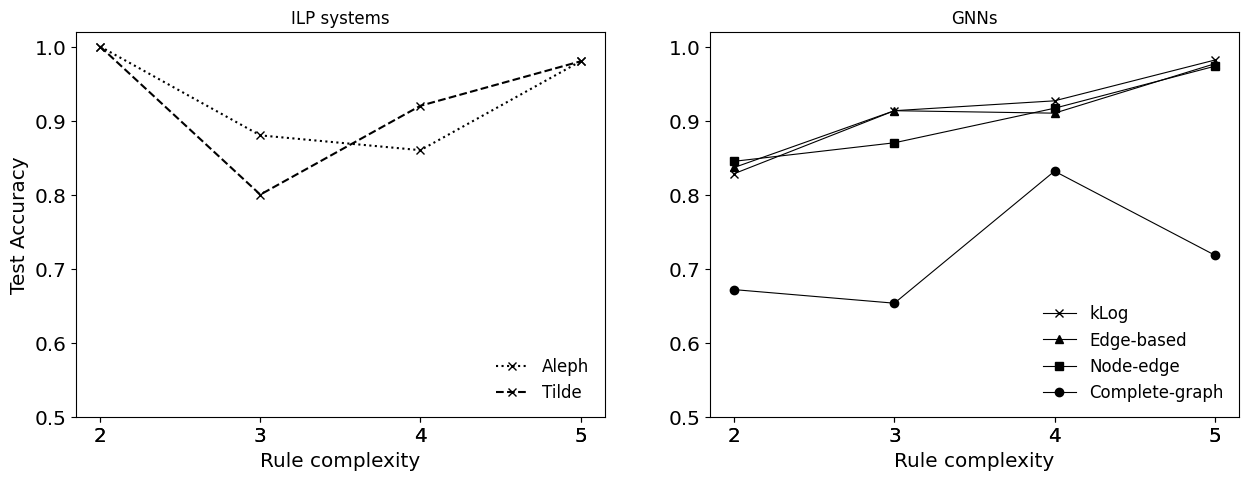

In [25]:
### Rule complexity
path = "Bongard/RuleComplexityExperiment_0"
x_axis = 'rule_complexity'
logic_key = 'system'

exp = Experiment(path)
logic_df = pd.read_csv(exp.results_path + "/logic_results_combined.csv")
logic_df = logic_df[logic_df['system'] != 'popper']
gnn_df = pd.read_csv(exp.results_path + "/gnn_results_combined.csv")


logic_lines = {"tilde":"dashed", "aleph":"dotted"}
logic_label_map = {"tilde": "Tilde","aleph":"Aleph"}

markers = {"node_only": "o", "node_edge": "s", "edge_based": "^","Klog":"x"}
gnn_linewidth = 0.8
label_map = {"node_only": "Complete-graph", "node_edge": "Node-edge", "edge_based": "Edge-based","Klog":"kLog"}


fig,axs = plt.subplots(1,2, figsize=(15,5))
for key, group in logic_df.groupby(logic_key):
    axs[0].plot(group[x_axis],group['accuracy'],label=logic_label_map[key],marker='x',linestyle=logic_lines[key],color='black')

for key, group in gnn_df.groupby('representation'):
    grouped_mean_train = group.groupby(x_axis)['train_acc'].mean()
    grouped_mean_test = group.groupby(x_axis)['test_acc'].mean()
    axs[1].plot(grouped_mean_test.index,grouped_mean_test.values,label=label_map[key],marker=markers[key],linewidth=gnn_linewidth,color='black')


for ax in axs.flatten():
    ax.legend()
    ax.set_ylim(0.5,1.02)
    ax.set_yticks(np.arange(0.5,1.05,0.1))
    ax.legend(loc='lower right',fontsize='large',frameon=False)
    # x_ticks
    x_ticks = [int(x) for x in ax.get_xticks()]
    x_ticks.remove(1)
    ax.set_xticks(x_ticks)
    ax.set_xlabel("Rule complexity",fontsize='x-large')
    if ax == axs[0]:
        ax.set_ylabel("Test Accuracy",fontsize='x-large')
    ax.tick_params(labelsize='x-large')

axs[0].set_title("ILP systems")
axs[1].set_title("GNNs")
plt.show()



In [ ]:
exp = Experiment("Bongard/ObjectRelationComplexityExperiment_0")
exp.combine_results()

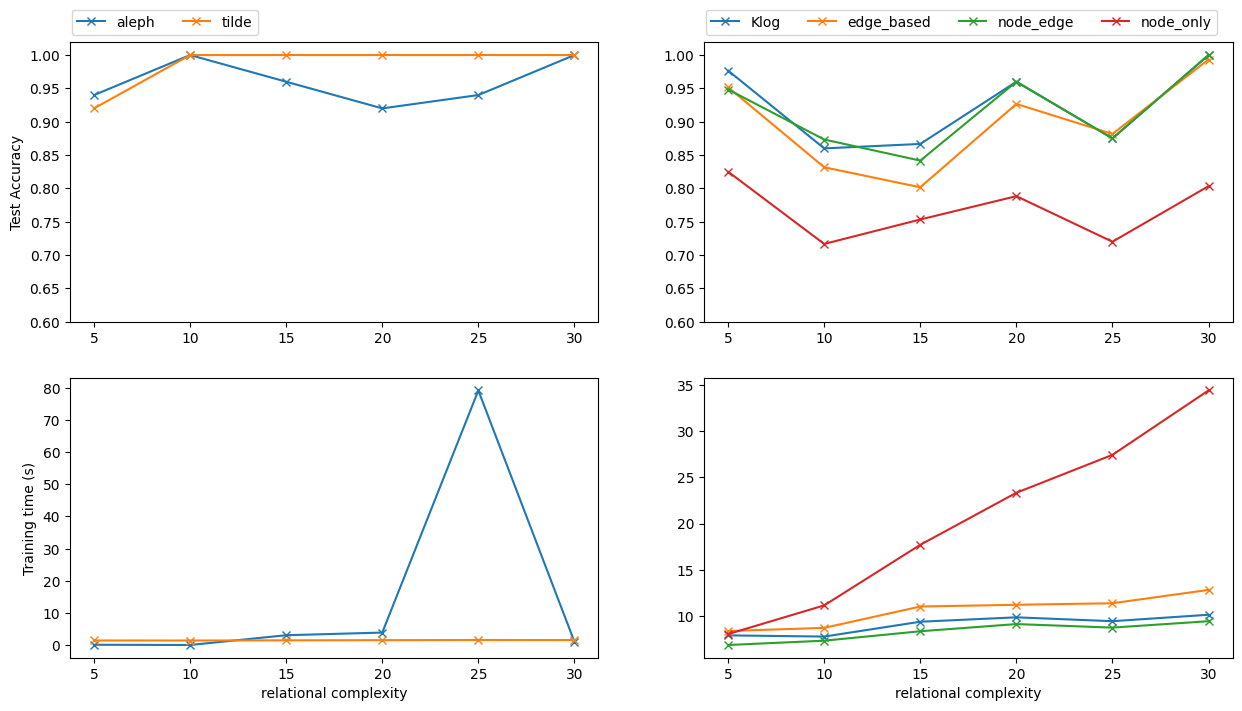

In [ ]:
### Object complexity

path = "Bongard/ObjectComplexityExperiment_0"
x_axis = 'object_complexity'
logic_key = 'system'

exp = Experiment(path)
logic_df = pd.read_csv(exp.results_path + "/logic_results_combined.csv")
logic_df = logic_df[logic_df['system'] != 'popper']
logic_df = logic_df[logic_df["object_complexity"]<= 30]
gnn_df = pd.read_csv(exp.results_path + "/gnn_results_combined.csv")
gnn_df = gnn_df[gnn_df["object_complexity"]<= 30]

fig,axs = plt.subplots(2,2, figsize=(15,8),)
for key, group in logic_df.groupby(logic_key):
    axs[0,0].plot(group[x_axis],group['accuracy'],label=key,marker='x')
    axs[1,0].plot(group[x_axis],group['runtime'],label=key,marker='x')

for key, group in gnn_df.groupby('representation'):
    grouped_mean_test = group.groupby(x_axis)['test_acc'].mean()
    grouped_mean_runtime = group.groupby(x_axis)['runtime'].mean()
    axs[0,1].plot(grouped_mean_test.index,grouped_mean_test.values,label=key,marker='x')
    axs[1,1].plot(grouped_mean_runtime.index,grouped_mean_runtime.values,label=key,marker='x')

# Add title
# fig.suptitle(path.split("/")[-1] + " Accuracy")

for ax in axs.flatten():
    #ax.legend()
    if ax == axs[0,1] or ax == axs[0,0]:
        ax.set_ylim(0.6,1.02)
        if ax == axs[0,0]:
            ax.legend(bbox_to_anchor=(-0.01, 1), loc='lower left',ncol=2)
        else:
            ax.legend(bbox_to_anchor=(-0.01, 1), loc='lower left',ncol=4)
    if ax == axs[0,0]:
        ax.set_ylabel("Test Accuracy")
    if ax == axs[1,0]:
        ax.set_ylabel("Training time (s)")
    if ax == axs[1,0] or ax == axs[1,1]:
        ax.set_xlabel("relational complexity")


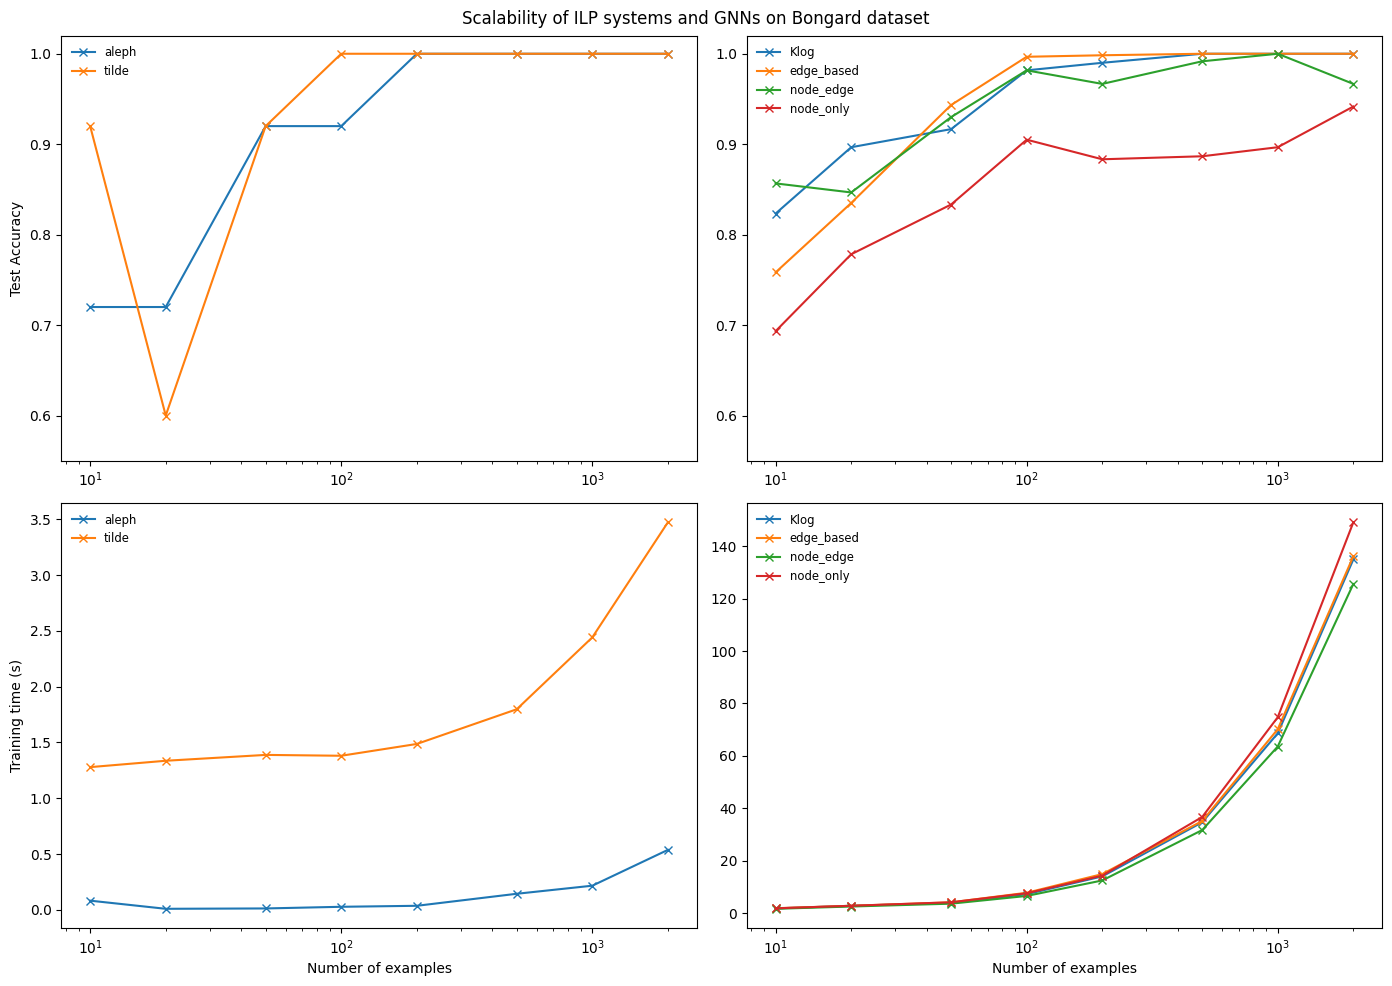

In [ ]:
### Scaling complexity
path = "Bongard/ScalingExperimentArchived"
x_axis = 'num_examples'
logic_key = 'system'

exp = Experiment(path)
logic_df = pd.read_csv(exp.results_path + "/logic_results_combined.csv")
logic_df = logic_df[logic_df['system'] != 'popper']
gnn_df = pd.read_csv(exp.results_path + "/gnn_results_combined.csv")

fig,axs = plt.subplots(2,2, figsize=(14,10))
for key, group in logic_df.groupby(logic_key):
    axs[0,0].plot(group[x_axis],group['accuracy'],label=key,marker='x')
    axs[1,0].plot(group[x_axis],group['runtime'],label=key,marker='x')

for key, group in gnn_df.groupby('representation'):
    grouped_mean_test = group.groupby(x_axis)['test_acc'].mean()
    grouped_mean_runtime = group.groupby(x_axis)['runtime'].mean()
    axs[0,1].plot(grouped_mean_test.index,grouped_mean_test.values,label=key,marker='x')
    axs[1,1].plot(grouped_mean_runtime.index,grouped_mean_runtime.values,label=key,marker='x')

# Add title
# fig.suptitle(path.split("/")[-1] + " Accuracy")
fig.suptitle("Scalability of ILP systems and GNNs on Bongard dataset")
for ax in axs.flatten():
    #ax.legend()
    ax.set_xscale('log')
    ax.legend(loc='best', fontsize='small', frameon=False)
    if ax == axs[0,1] or ax == axs[0,0]:
        ax.set_ylim(0.55,1.02)
    #     if ax == axs[0,0]:
    #         ax.legend(bbox_to_anchor=(-0.01, 1), loc='lower left',ncol=2)
    #     else:
    #         ax.legend(bbox_to_anchor=(-0.01, 1), loc='lower left',ncol=4)
    if ax == axs[0,0]:
        ax.set_ylabel("Test Accuracy")
    if ax == axs[1,0]:
        ax.set_ylabel("Training time (s)")
    if ax == axs[1,0] or ax == axs[1,1]:
        ax.set_xlabel("Number of examples")
fig.tight_layout(pad=1.0)
plt.show()

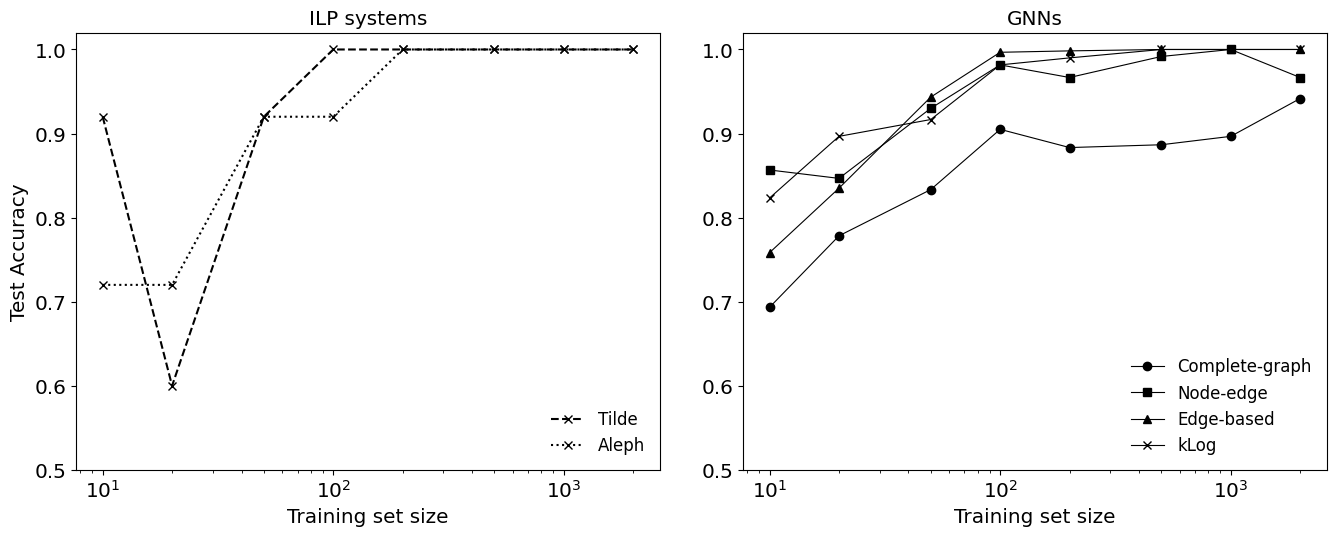

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from Experiments.experiment import Experiment


path = "Bongard/ScalingExperimentArchived"
exp = Experiment(path)
logic_df = pd.read_csv(exp.results_path + "/logic_results_combined.csv")
logic_df = logic_df[logic_df['system'] != 'popper']
gnn_df = pd.read_csv(exp.results_path + "/gnn_results_combined.csv")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Define line styles and markers
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x', 'D', '+']
linewidth = 1.5

logic_lines = {"tilde":"dashed", "aleph":"dotted"}
logic_label_map = {"tilde": "Tilde","aleph":"Aleph"}

gnn_line = "solid"
gnn_markers = {"node_only": "o", "node_edge": "s", "edge_based": "^","Klog":"x"}
gnn_linewidth = 0.8
gnn_label_map = {"node_only": "Complete-graph", "node_edge": "Node-edge", "edge_based": "Edge-based","Klog":"kLog"}

# Plot for logic_df using only black color
for (key, marker, ls) in zip(logic_df['system'].unique(), markers, line_styles):
    group = logic_df[logic_df['system'] == key]
    axs[0].plot(group['num_examples'], group['accuracy'], label=logic_label_map[key], linestyle=logic_lines[key], color='black',linewidth=linewidth,marker="x")

# Plot for gnn_df using only black color
for (key, marker, ls) in zip(gnn_df['representation'].unique(), markers, line_styles):
    group = gnn_df[gnn_df['representation'] == key]
    grouped_mean_test = group.groupby('num_examples')['test_acc'].mean()
    grouped_mean_runtime = group.groupby('num_examples')['runtime'].mean()
    axs[1].plot(grouped_mean_test.index, grouped_mean_test.values, label=gnn_label_map[key], marker=gnn_markers[key], linestyle=gnn_line, color='black',linewidth=gnn_linewidth)

# Set log scale for x-axis and adjust y-limits
for ax in axs.flatten():
    ax.set_xscale('log')
    ax.xaxis.set_major_locator(LogLocator(base=10.0))
    if ax in (axs[0], axs[1]):
        ax.set_ylim(0.5, 1.02)
    ax.tick_params(labelsize='x-large')

# Add labels and legends
for ax in axs.flat:
    ax.legend(loc='lower right',fontsize='large',frameon=False)

axs[0].set_title("ILP systems",fontsize='x-large')
axs[1].set_title("GNNs",fontsize='x-large')

axs[0].set_ylabel("Test Accuracy",fontsize='x-large')
axs[0].set_xlabel("Training set size",fontsize='x-large')
axs[1].set_xlabel("Training set size",fontsize='x-large')

fig.tight_layout(pad=3.0)
plt.show()




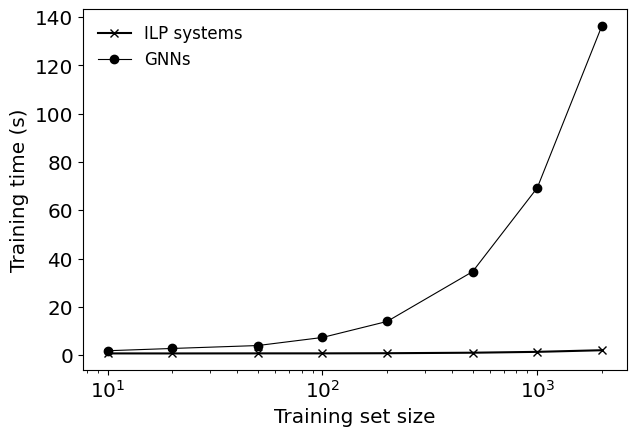

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from Experiments.experiment import Experiment


path = "Bongard/ScalingExperimentArchived"
exp = Experiment(path)
logic_df = pd.read_csv(exp.results_path + "/logic_results_combined.csv")
logic_df = logic_df[logic_df['system'] != 'popper']
gnn_df = pd.read_csv(exp.results_path + "/gnn_results_combined.csv")

fig, axs = plt.subplots(1, 1, figsize=(7, 5))

# Define line styles and markers
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x', 'D', '+']
linewidth = 1.5

logic_lines = {"tilde":"dashed", "aleph":"dotted"}
logic_label_map = {"tilde": "Tilde","aleph":"Aleph"}

gnn_line = "solid"
gnn_markers = {"node_only": "o", "node_edge": "s", "edge_based": "^","Klog":"x"}
gnn_linewidth = 0.8
gnn_label_map = {"node_only": "Complete-graph", "node_edge": "Node-edge", "edge_based": "Edge-based","Klog":"kLog"}

# Plot for logic_df using only black color
group = logic_df.groupby('num_examples')['runtime'].mean()
axs.plot(group.index, group.values, label="ILP systems", color='black',linewidth=linewidth,marker="x")

# Plot for gnn_df using only black color
grouped_mean_runtime = gnn_df.groupby('num_examples')['runtime'].mean()
axs.plot(grouped_mean_runtime.index, grouped_mean_runtime.values, label="GNNs", marker="o", color='black',linewidth=gnn_linewidth)

# Set log scale for x-axis and adjust y-limits

axs.set_xscale('log')
axs.xaxis.set_major_locator(LogLocator(base=10.0))
axs.tick_params(labelsize='x-large')

axs.set_ylabel("Training time (s)", fontsize='x-large')
axs.set_xlabel("Training set size", fontsize='x-large')
axs.legend(loc='best',fontsize='large',frameon=False)

fig.tight_layout(pad=3.0)
plt.show()

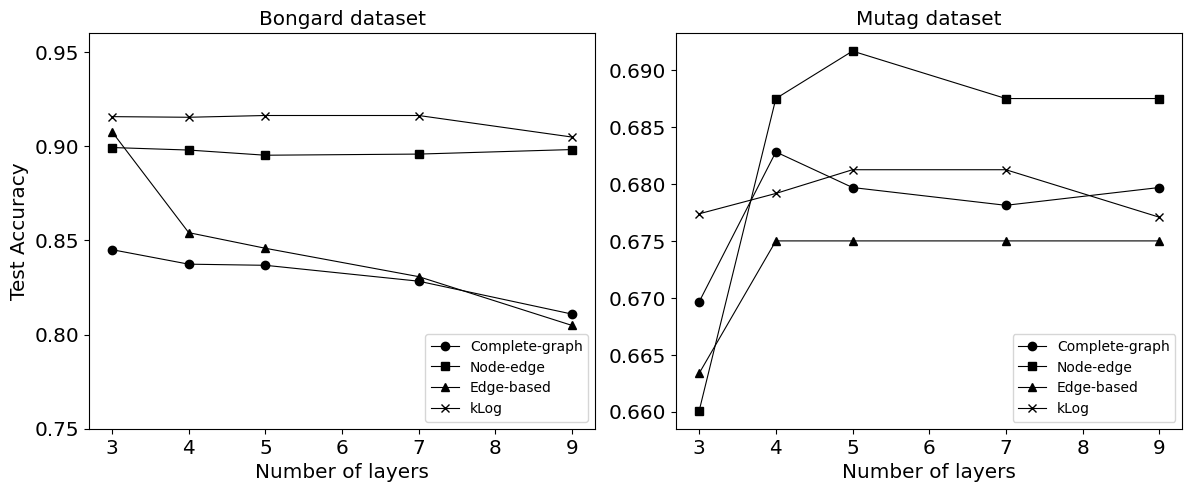

In [27]:
### Layers experiment

fig,axs = plt.subplots(1,2, figsize=(12,5))

gnn_line = "solid"
gnn_markers = {"node_only": "o", "node_edge": "s", "edge_based": "^","Klog":"x"}
gnn_linewidth = 0.8
gnn_label_map = {"node_only": "Complete-graph", "node_edge": "Node-edge", "edge_based": "Edge-based","Klog":"kLog"}

dataset = "mutag"

normal_gnn = pd.read_csv(f"docker/Benchmark/{dataset}/results/results_gnn_final.csv")
layers_gnn = pd.read_csv(f"docker/Benchmark/{dataset}/results/results_gnn_layers.csv")
total_gnn = pd.concat([normal_gnn,layers_gnn])

grouped_gnn = total_gnn.groupby(by=['representation','layers'])["test_acc"].mean()
# leave out the layers = 2
grouped_gnn = grouped_gnn.drop(2,level=1)
for repr in total_gnn['representation'].unique():
    axs[1].plot(grouped_gnn[repr].index,grouped_gnn[repr], label=gnn_label_map[repr],marker=gnn_markers[repr],color='black',linewidth=gnn_linewidth)


dataset = "bongard"

normal_gnn = pd.read_csv(f"docker/Benchmark/{dataset}/results/results_gnn_final.csv")
layers_gnn = pd.read_csv(f"docker/Benchmark/{dataset}/results/results_gnn_layers.csv")
total_gnn = pd.concat([normal_gnn,layers_gnn])

grouped_gnn = total_gnn.groupby(by=['representation','layers'])["test_acc"].mean()
# leave out the layers = 2
grouped_gnn = grouped_gnn.drop(2,level=1)
for repr in total_gnn['representation'].unique():
    axs[0].plot(grouped_gnn[repr].index,grouped_gnn[repr], label=gnn_label_map[repr],marker=gnn_markers[repr],color='black',linewidth=gnn_linewidth)


for ax in axs:
    ax.legend()
    ax.legend(loc='lower right')
    ax.set_xlabel("Number of layers",fontsize='x-large')
    ax.set_title("Bongard dataset" if ax == axs[0] else "Mutag dataset",fontsize='x-large')
    if ax == axs[0]:
        ax.set_ylim(0.75,0.96)
        ax.set_yticks(np.arange(0.75,0.96,0.05))
    ax.tick_params(labelsize='x-large')

axs[0].set_ylabel("Test Accuracy",fontsize='x-large')
        
fig.tight_layout(pad=1.0)
plt.show()



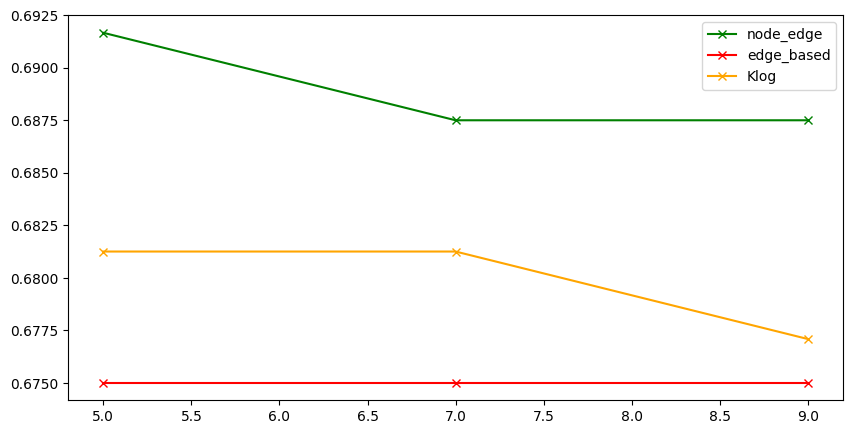

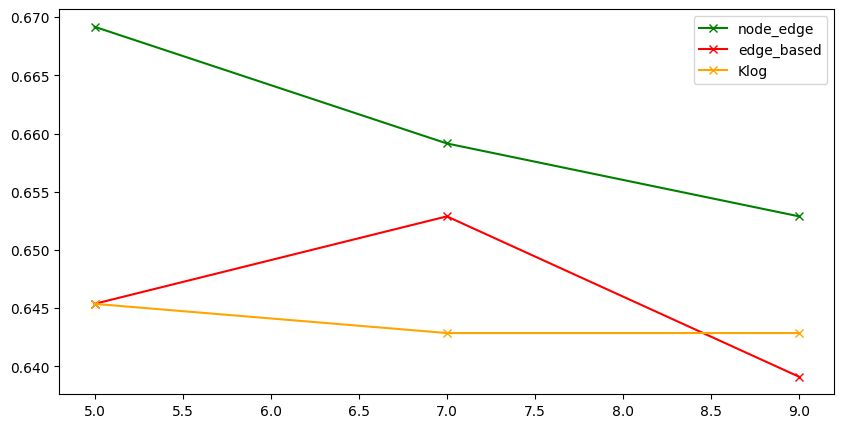

In [ ]:
### Layers experiment
datasets = ["krk","bongard","train"]
dataset = datasets[2]
dataset = "mutag"

normal_gnn = pd.read_csv(f"docker/Benchmark/{dataset}/results/results_gnn_final.csv")
layers_gnn = pd.read_csv(f"docker/Benchmark/{dataset}/results/results_gnn_layers.csv")

# total_gnn = pd.concat([normal_gnn,layers_gnn])
#print(total_gnn.groupby(by=['representation','layers',"hidden_dims","model"])["test_acc"].mean())

# grouped_gnn = total_gnn.groupby(by=['representation','model','layers'])["test_acc"].mean()
# #print(grouped_gnn)
# #plot the results y-axis test acc and x-axis layers for every representation
# fig,ax = plt.subplots(1,1, figsize=(10,5))
# for repr in total_gnn['representation'].unique():
#     current_test_acc = []
#     for layer in total_gnn['layers'].unique():
#         best_model = grouped_gnn[repr,:,layer].idxmax()
#         best_acc = grouped_gnn[repr,:,layer].max()
#         current_test_acc.append(best_acc)
#     ax.plot(grouped_gnn[repr,best_model,:],current_test_acc, label=repr)

# ax.legend()
# plt.show()

colors = {'node_only':'blue','edge_based':'red','node_edge':'green','Klog':'orange'}
depths = {'node_only':1,'edge_based':4,'node_edge':1,'Klog':2}

fig,ax = plt.subplots(1,1, figsize=(10,5))
grouped_gnn = layers_gnn.groupby(by=['representation','layers'])["test_acc"].mean()
for repr in layers_gnn['representation'].unique():
    ax.plot(grouped_gnn[repr].index,grouped_gnn[repr], label=repr, color=colors[repr],marker='x')
    #ax.axvline(x=depths[repr], color=colors[repr], linestyle='--', label=f'{repr} diameter')

ax.legend()
plt.show()

fig,ax = plt.subplots(1,1, figsize=(10,5))
grouped_gnn = layers_gnn.groupby(by=['representation','layers'])["train_acc"].mean()
for repr in layers_gnn['representation'].unique():
    ax.plot(grouped_gnn[repr].index,grouped_gnn[repr], label=repr, color=colors[repr],marker='x')
    #ax.axvline(x=depths[repr], color=colors[repr], linestyle='--', label=f'{repr} diameter')

ax.legend()
plt.show()